## CS 530 – Final take home exam  (20 points)
## Due: Sunday, May 24 at 11:59pm
     ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
**This exam is individual and—unlike the final project—is therefore meant to be taken alone rather than in a group. Please write your name below to certify that you have worked on this exam by yourself and the code written in this exam as well as all the text explaining your results is yours and yours alone or code that you yourself have found only legitimately and in the public domain on the internet. You have not discussed this exam with anyone else and certainly have not used code, text, or other information from anyone in any part of the exam below. You have also not shared any code or text that you have written with anyone else.<br>
Your name: Duc Le <br>**


Make sure you submit your zipped file (Jupyter notebook + CSV file) to Canvas after you finish this exam (do not attach the dataset). In addition, we strongly encourage you to do all of the following to minimize loss of points of this exam:
<li>   Double check and make sure that all your code blocks runs smoothly. This should be the very last thing you do before submitting. If you then change just one little thing in the code, check again that it all runs well before submitting. Submitting code that does not run will be highly detrimental for your grade.
<li>   The Jupyter notebook should be readable, well designed and styled. It should look like a report to solve an important problem (not something put together hastily and haphazardly). Clean up your block outputs. Do not leave anything that might be confusing for the reader. In this exam, just like in real life, if your report is confusing to the reader, that is on you and not on the reader. One way to achieve this is to finish the exam well in advance of the deadline, go do something else for a day or two, and then read your submission carefully again. You will typically find that many things that were supposedly clear to you when you read the submission just after finishing writing it all no longer make sense when you read it a few days later. Naturally, if it is not clear to you a few days later, it would not be clear to any other reader too. This will give you a chance to modify your submission before finally submitting it.

     
     ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++




**In the questions below, make sure to use the appropriate goodness of fit measures in your discussion (R^2, adjusted R^2, AIC, BIC, accuracy, ROC AUC, ...). When you carry out any improvements you think you can make to the machine-learning models you build, you should explain whether they work, and—importantly—why. Visualizing the dataset and plotting various graphs as discussed below is important. But you must convince us that you understand why you got the results that you did**

(8 points)  Q1. Load the dataset in the zip file with the below code:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
import matplotlib.image as mpimg
%matplotlib inline

Using TensorFlow backend.


In [2]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from tensorflow.keras import regularizers
from keras.layers import Dropout

In [3]:
xtrain = np.loadtxt('xtrain.csv')
xtest = np.loadtxt('xtest.csv')
ytrain = np.loadtxt('ytrain.csv')
ytest = np.loadtxt('ytest.csv')

This dataset consists of 47,520 training samples and 6,480 test samples. Each example is a 28x28 grayscale image, associated with a label from 1 of 9 possible classes. 

In this question, you will design a classification neural network. When asked to discuss various effects below, discussing them in relation to the bias-variance tradeoff is likely to be useful. 

<li> a) Visualize this dataset (5 samples for each class).<br>
<li> b) Do the data preprocessing for your neural network. <br>
<li> c)Use the Keras package and train a neural network to achieve at least 90% accuracy on the test set. Explain the architecture you chose—i.e., the number of layers, their width, the neuron types, the activation functions, etc. 
<li>d) Use at least 3 regularization techniques to improve the accuracy of the network you designed in part (a). Describe the improvement in the classification accuracy that you get from each technique. Explain why each technique worked or did not work.  <br>
<li>e) Augment the training dataset (x2 and x3) and test your model. Which augmentation methods did you use? Explain why it did or did not improve the accuracy.  <br>

**For part c, d, and e, plot the loss function and accuracy**



In [4]:
#print(xtrain.shape, xtest.shape , ytrain.shape, ytest.shape)
xtrain1 = xtrain.reshape((xtrain.shape[0], 28,28))

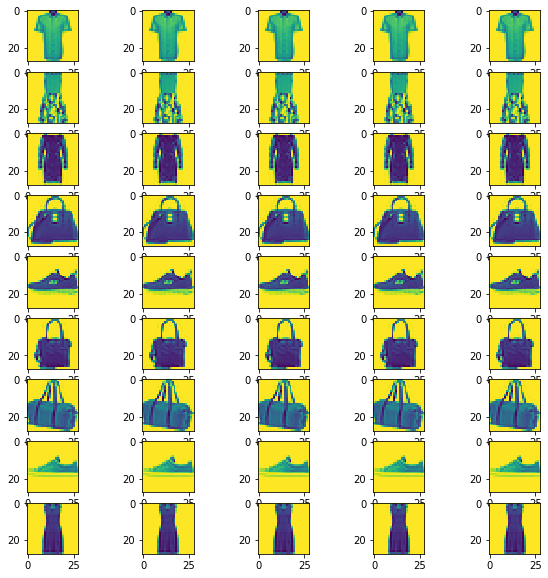

In [5]:
### your code for part a

fig, ax = plt.subplots(9,5, figsize = (10,10))

for i in range(9):
    for j in range(5):
        ax[i,j].imshow(xtrain1[i])

In [6]:
### your code for part b

ymin = np.amin(ytrain)

ytrain2 = np.array([])
ytest2 = np.array([])

for i in ytrain:
    y = i - ymin
    ytrain2 = np.append(ytrain2, y)
    
for i in ytest: 
    y = i - ymin
    ytest2 = np.append(ytest2, y)
    
num_classes = 9

xtrain = xtrain.reshape(-1, 784) #28*28=784
xtest = xtest.reshape(-1, 784)

xtrain = xtrain.astype('float32')  
xtest = xtest.astype('float32')

xtrain /= np.amax(xtrain) 
xtest /= np.amax(xtest)

In [7]:
ytrain2 = keras.utils.to_categorical(ytrain2, num_classes)
ytest2 = keras.utils.to_categorical(ytest2, num_classes)

In [8]:
### your code for part c

# I chose to have a high number of neurons per layer rather than having a lot of layers to reduce the computational expense.
# I experimented with a different amount of layers and neurons and decided that 4 hidden layers with a size of 500 neurons
# achieves 90% accuracy within 30 epochs.
# I pick tanh as the activation function because it performs better than sigmoid due to a wider range 
# and RELU due to the possibility of non-linearity in this data set.

model1 = Sequential()

model1.add(Dense(500, activation = 'tanh', input_shape=(784,)))

model1.add(Dense(380, activation = 'tanh'))

model1.add(Dense(420, activation = 'tanh'))

model1.add(Dense(480, activation = 'tanh'))

model1.add(Dense(560, activation = 'tanh'))

model1.add(Dense(484, activation = 'tanh'))

model1.add(Dense(num_classes, activation='softmax'))

model1.compile(
    loss = 'categorical_crossentropy', 
    optimizer = SGD(lr = 0.02),
    metrics = ['accuracy'])      

history = model1.fit(
    xtrain, ytrain2,                             
    epochs = 30,                    
    validation_data = (xtest, ytest2))

Train on 47520 samples, validate on 6480 samples
Epoch 1/30
47520/47520 [==============================] - 22s 453us/step - loss: 0.6589 - accuracy: 0.7551 - val_loss: 0.4754 - val_accuracy: 0.8278
Epoch 2/30
47520/47520 [==============================] - 23s 494us/step - loss: 0.4932 - accuracy: 0.8169 - val_loss: 0.4931 - val_accuracy: 0.8102
Epoch 3/30
47520/47520 [==============================] - 21s 451us/step - loss: 0.4466 - accuracy: 0.8349 - val_loss: 0.4511 - val_accuracy: 0.8324
Epoch 4/30
47520/47520 [==============================] - 22s 459us/step - loss: 0.4161 - accuracy: 0.8450 - val_loss: 0.4289 - val_accuracy: 0.8440
Epoch 5/30
47520/47520 [==============================] - 25s 534us/step - loss: 0.3943 - accuracy: 0.8542 - val_loss: 0.4213 - val_accuracy: 0.8488
Epoch 6/30
47520/47520 [==============================] - 24s 515us/step - loss: 0.3771 - accuracy: 0.8602 - val_loss: 0.3711 - val_accuracy: 0.8642
Epoch 7/30
47520/47520 [==============================] -

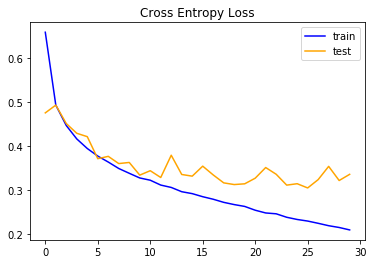

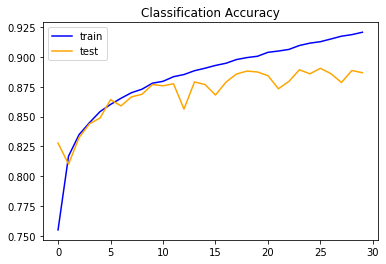

In [9]:
# plot loss
plt.title('Cross Entropy Loss')
plt.plot(history.history['loss'], color = 'blue', label = 'train')
plt.plot(history.history['val_loss'], color = 'orange', label = 'test')
plt.legend()
plt.show()

# plot accuracy
plt.title('Classification Accuracy')
plt.plot(history.history['accuracy'], color = 'blue', label = 'train')
plt.plot(history.history['val_accuracy'], color = 'orange', label = 'test')
plt.legend()
plt.show()

In [10]:
### your code for part d

# First method of regularization: Layer weight regularization.
# I applied regularizers to the kernel in the early layers so it prevents the NN from overfitting at the early stage.
# Followed by bias + activity regularizers near the output layer so the network can produce more accurate outputs.
# I chose l2 norm for the kernel & activity b/c I want to minimize the impact of the non-important nodes
# and l1 norm for the bias b/c I want to exclude the non-impactful biases from the process.

model2 = Sequential()

model2.add(Dense(500, activation = 'tanh', input_shape=(784,)))

model2.add(Dense(380, activation = 'tanh'))

model2.add(Dense(420, activation = 'tanh', kernel_regularizer = regularizers.l2(1e-4)))

model2.add(Dense(480, activation = 'tanh', kernel_regularizer = regularizers.l2(1e-4)))

model2.add(Dense(560, activation = 'tanh', bias_regularizer = regularizers.l1(1e-4)))

model2.add(Dense(484, activation = 'tanh'))

model2.add(Dense(num_classes, activation='softmax',activity_regularizer = regularizers.l2(1e-3)))

model2.compile(
    loss = 'categorical_crossentropy', 
    optimizer = SGD(lr = 0.025),
    metrics = ['accuracy'])      

history = model2.fit(
    xtrain, ytrain2,                             
    epochs = 30,                    
    validation_data = (xtest, ytest2))

Train on 47520 samples, validate on 6480 samples
Epoch 1/30
47520/47520 [==============================] - 19s 406us/step - loss: 0.7798 - accuracy: 0.7473 - val_loss: 0.6565 - val_accuracy: 0.8014
Epoch 2/30
47520/47520 [==============================] - 19s 402us/step - loss: 0.6054 - accuracy: 0.8155 - val_loss: 0.5754 - val_accuracy: 0.8289
Epoch 3/30
47520/47520 [==============================] - 19s 395us/step - loss: 0.5537 - accuracy: 0.8355 - val_loss: 0.5296 - val_accuracy: 0.8509
Epoch 4/30
47520/47520 [==============================] - 19s 390us/step - loss: 0.5220 - accuracy: 0.8452 - val_loss: 0.5147 - val_accuracy: 0.8468
Epoch 5/30
47520/47520 [==============================] - 19s 393us/step - loss: 0.4999 - accuracy: 0.8518 - val_loss: 0.4685 - val_accuracy: 0.8676
Epoch 6/30
47520/47520 [==============================] - 19s 408us/step - loss: 0.4812 - accuracy: 0.8593 - val_loss: 0.4879 - val_accuracy: 0.8616
Epoch 7/30
47520/47520 [==============================] -

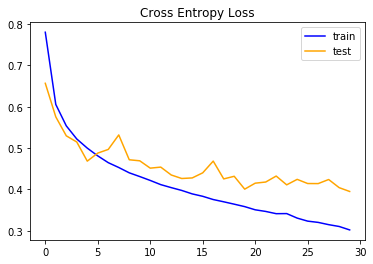

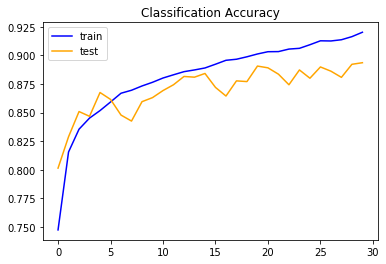

In [11]:
# plot loss
plt.title('Cross Entropy Loss')
plt.plot(history.history['loss'], color = 'blue', label = 'train')
plt.plot(history.history['val_loss'], color = 'orange', label = 'test')
plt.legend()
plt.show()

# plot accuracy
plt.title('Classification Accuracy')
plt.plot(history.history['accuracy'], color = 'blue', label = 'train')
plt.plot(history.history['val_accuracy'], color = 'orange', label = 'test')
plt.legend()
plt.show()

In [12]:
### your code for part d

# The Dropout regularization method does not seem to improve the accuracy.
# The reasoning could be because this method is dependent on chance & random nodes being dropped from the network.
# Although it might put pressure on the remaining nodes to perform better, we have no control over which node is dropped
# and we don't know how impactful those nodes are to the classification process.
model3 = Sequential()

model3.add(Dense(500, activation = 'tanh', input_shape=(784,)))

model3.add(Dropout(0.3))

model3.add(Dense(380, activation = 'tanh'))

model3.add(Dense(420, activation = 'tanh'))

model3.add(Dense(480, activation = 'tanh'))

model3.add(Dense(560, activation = 'tanh', kernel_regularizer = regularizers.l2(1e-4)))

model3.add(Dropout(0.4))

model3.add(Dense(484, activation = 'tanh'))

model3.add(Dense(num_classes, activation='softmax', activity_regularizer = regularizers.l2(1e-3)))

model3.compile(
    loss = 'categorical_crossentropy', 
    optimizer = SGD(lr = 0.025),
    metrics = ['accuracy'])      

history = model3.fit(
    xtrain, ytrain2,                             
    epochs = 30,                    
    validation_data = (xtest, ytest2))

Train on 47520 samples, validate on 6480 samples
Epoch 1/30
47520/47520 [==============================] - 22s 464us/step - loss: 0.7942 - accuracy: 0.7314 - val_loss: 0.6012 - val_accuracy: 0.7974
Epoch 2/30
47520/47520 [==============================] - 21s 441us/step - loss: 0.6196 - accuracy: 0.7997 - val_loss: 0.5196 - val_accuracy: 0.8392
Epoch 3/30
47520/47520 [==============================] - 20s 427us/step - loss: 0.5710 - accuracy: 0.8174 - val_loss: 0.5708 - val_accuracy: 0.8207
Epoch 4/30
47520/47520 [==============================] - 20s 423us/step - loss: 0.5448 - accuracy: 0.8275 - val_loss: 0.5200 - val_accuracy: 0.8468
Epoch 5/30
47520/47520 [==============================] - 19s 402us/step - loss: 0.5234 - accuracy: 0.8344 - val_loss: 0.5564 - val_accuracy: 0.8318
Epoch 6/30
47520/47520 [==============================] - 20s 413us/step - loss: 0.5102 - accuracy: 0.8381 - val_loss: 0.4771 - val_accuracy: 0.8528
Epoch 7/30
47520/47520 [==============================] -

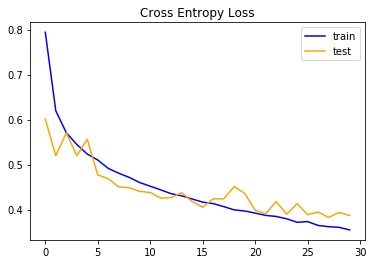

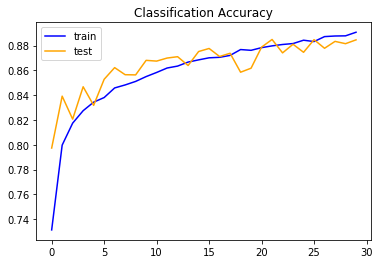

In [13]:
# plot loss
plt.title('Cross Entropy Loss')
plt.plot(history.history['loss'], color = 'blue', label = 'train')
plt.plot(history.history['val_loss'], color = 'orange', label = 'test')
plt.legend()
plt.show()

# plot accuracy
plt.title('Classification Accuracy')
plt.plot(history.history['accuracy'], color = 'blue', label = 'train')
plt.plot(history.history['val_accuracy'], color = 'orange', label = 'test')
plt.legend()
plt.show()

In [14]:
from keras.callbacks import EarlyStopping
# I used 'validation accuracy' as a stopping criteria for because I want to stop the network if the performance of the 
# validation set does not improve within 2 epochs.
# This does not improve the accuracy as much as kernel regularizations but does better than dropout. 
# Reasoning is also because validation sets are randomized so there is not a fixed error curve for E.S to follow.
# Thus I think the accuracy will fluctuate each run depending on how the validation set performs.

model4 = Sequential()

model4.add(Dense(500, activation = 'tanh', input_shape=(784,)))

model4.add(Dropout(0.3))

model4.add(Dense(380, activation = 'tanh'))

model4.add(Dense(420, activation = 'tanh'))

model4.add(Dense(480, activation = 'tanh'))

model4.add(Dense(560, activation = 'tanh', kernel_regularizer = regularizers.l2(1e-4)))

model4.add(Dense(484, activation = 'tanh'))

model4.add(Dense(num_classes, activation='softmax', activity_regularizer = regularizers.l2(1e-3)))

model4.compile(
    loss = 'categorical_crossentropy', 
    optimizer = SGD(lr = 0.02),
    metrics = ['accuracy'])      

history = model4.fit(
    xtrain, ytrain2,                             
    epochs = 30,  
    validation_data = (xtest, ytest2),
    callbacks = [EarlyStopping(monitor='val_accuracy', patience = 3)])

Train on 47520 samples, validate on 6480 samples
Epoch 1/30
47520/47520 [==============================] - 22s 459us/step - loss: 0.7572 - accuracy: 0.7460 - val_loss: 0.6616 - val_accuracy: 0.7653
Epoch 2/30
47520/47520 [==============================] - 22s 454us/step - loss: 0.5958 - accuracy: 0.8066 - val_loss: 0.5403 - val_accuracy: 0.8253
Epoch 3/30
47520/47520 [==============================] - 23s 485us/step - loss: 0.5520 - accuracy: 0.8244 - val_loss: 0.5035 - val_accuracy: 0.8426
Epoch 4/30
47520/47520 [==============================] - 26s 542us/step - loss: 0.5253 - accuracy: 0.8354 - val_loss: 0.4891 - val_accuracy: 0.8508
Epoch 5/30
47520/47520 [==============================] - 22s 455us/step - loss: 0.5034 - accuracy: 0.8419 - val_loss: 0.4675 - val_accuracy: 0.8573
Epoch 6/30
47520/47520 [==============================] - 21s 446us/step - loss: 0.4909 - accuracy: 0.8465 - val_loss: 0.5085 - val_accuracy: 0.8443
Epoch 7/30
47520/47520 [==============================] -

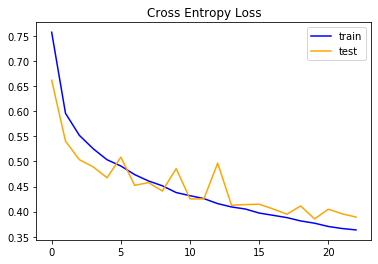

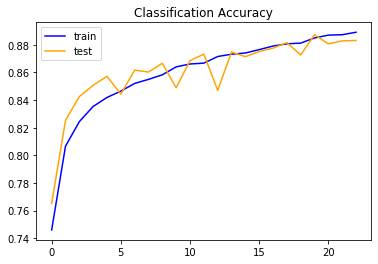

In [15]:
# plot loss
plt.title('Cross Entropy Loss')
plt.plot(history.history['loss'], color = 'blue', label = 'train')
plt.plot(history.history['val_loss'], color = 'orange', label = 'test')
plt.legend()
plt.show()

# plot accuracy
plt.title('Classification Accuracy')
plt.plot(history.history['accuracy'], color = 'blue', label = 'train')
plt.plot(history.history['val_accuracy'], color = 'orange', label = 'test')
plt.legend()
plt.show()

(8 points) Q2. Try at least 2 others classical (non-neural-network) machine-learning algorithms that we covered in this class to classify the same dataset. Make sure to tune any hyper-parameters of the models and plot the accuracy as a function of the values of those parameters. Explain those plots. What accuracies do you get? Why did the accuracies increase or decrease with relation to the values of the hyper-parameters? Discussing this with the bias-variance tradeoff in mind will likely be useful. How do these compare to the accuracies you got in Q1? Explain why the accuracies are higher, lower, or similar in terms of the assumptions, strengths, and weaknesses of the classification techniques you used in Q1 and Q2. Use the same data augmentation techniques that you used in Q1c with these algorithms. Compare the change in accuracy due to augmentation that you got here and that in Q1c. Explain any differences you might find.

In [16]:
### your code
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.metrics import plot_confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc

In [17]:
xtrain = np.loadtxt('xtrain.csv')
xtest = np.loadtxt('xtest.csv')
ytrain = np.loadtxt('ytrain.csv')
ytest = np.loadtxt('ytest.csv')

In [18]:
scaler = StandardScaler()
scaler.fit(xtrain)
scaler.fit(xtest)
xtrain = scaler.transform(xtrain)
xtest = scaler.transform(xtest)

In [19]:
acc = []
k = np.arange(2,5)
for i in k:
    knn = KNN(n_neighbors = i)
    knn.fit(xtrain, ytrain)
    ypred = knn.predict(xtest)
    acc.append(round(accuracy_score(ypred, ytest),4))

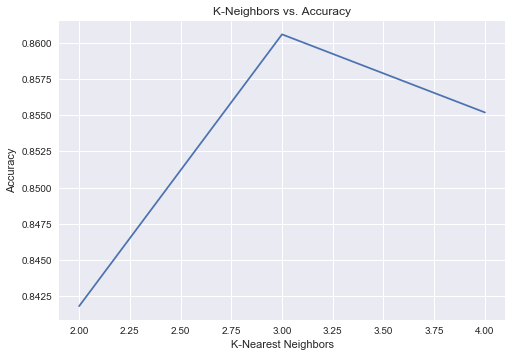

In [20]:
plt.style.use("seaborn")
plt.plot(k, acc)
plt.xlabel("K-Nearest Neighbors")
plt.ylabel("Accuracy")
plt.title("K-Neighbors vs. Accuracy")
plt.show()

In [21]:
# KNN performs equally well on the training data, depending on the number of k-nearest neighbors chosen.
# The accuracy tops out at k = 3 and does not improve much after that.
# The data was scaled in order for KNN to work well.
# The accuracy achieved by KNN is on par with my NN's from Q1.
# However, only problem with KNN is there aren't many parameters to tune & NN's with regularizers will perform better
# long-term with future data sets.

In [22]:
n = [100, 300, 500]
auc2 = []

for i in n:
    clf = RF(n_estimators = i,
            min_samples_leaf = 2,
            bootstrap = True, random_state = 42)
    clf.fit(xtrain, ytrain)
    ypred2 = clf.predict(xtest)
    acc = accuracy_score(ypred2, ytest)
    auc2.append(acc)

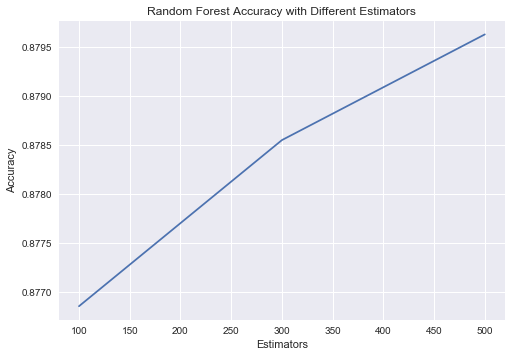

In [23]:
plt.plot(n, auc2)
plt.title("Random Forest Accuracy with Different Estimators")
plt.xlabel("Estimators")
plt.ylabel("Accuracy")
plt.show()

In [24]:
# RF performs well because it requires no assumption on the distribution of the data.
# RF also works well with multi-class classifcation.

(4 points) Q3. So far, we gave you both the training set and the test set for your models. But that is not what happens in real life. In real life, you prepare your model based on the training set to evaluate it on a test set to which you will have access only at some point in the future. To simulate that situation better, we are adding this question, which is related to evaluating your algorithms in Q1 and Q2 for predicting previously unseen data. On Friday, 5/22 at 12:01am, we will send you a collection of new samples without their associated labels. Your job is to run the algorithms you created for Q1 and Q2 on this new dataset and create a CSV file with 3 columns, which includes the labels that you predicted with your 3 proposed algorithms in the following order: first column is the NN from Q1, second column is the first model from Q2, and third column is the second model from Q2. You need to upload this CSV file to Canvas as your answer to this question. 

In [25]:
xnew = np.loadtxt("xnew.csv")
xnew = xnew.reshape(-1, 784)
xnew = xnew.astype('float32')
xnew /= np.amax(xnew)

In [26]:
q1 = model4.predict(xnew)
q1new = np.argmax(q1, axis = 1)
q1 = q1new + 247.

In [27]:
clf = KNN(n_neighbors = 3)
clf.fit(xtrain, ytrain)
q2 = clf.predict(xnew)

In [28]:
clf2 = RF(n_estimators = 500,
            min_samples_leaf = 2,
            bootstrap = True, random_state = 42)
clf2.fit(xtrain, ytrain)
q3 = clf2.predict(xnew)

In [29]:
ynew = pd.DataFrame({"NN ynew": q1, "KNN ynew": q2, "RF ynew": q3})
#ynew.to_csv(r"C:\Users\Duker\Desktop\CS530\Final Exam\ynew.csv")

Honestly, this final was not cool. This take-home portion was not even conceptually difficult in my opinion, the 
computation was way too hefty and time consuming. Please be more considerate for your future students as many of us have
other exams and responsibilities.
You could've easily cut the training data in half or  in a third and I don't think that would've affected the complexity of
this exam at all. I don't think the point of a final exam should be about how much patience you have waiting for hours of 
code to run, as not all of us have super computers.
I was genuinely worried my laptop was gonna explode from running hours worth of code.
Thank you for a wonderful semester, enjoy your summer.